2023-01-30 11:21:38.914403: W external/org_tensorflow/tensorflow/compiler/xla/service/platform_util.cc:198] unable to create StreamExecutor for CUDA:2: failed initializing StreamExecutor for CUDA device ordinal 2: INTERNAL: failed call to cuDevicePrimaryCtxRetain: CUDA_ERROR_OUT_OF_MEMORY: out of memory; total memory reported: 51041271808


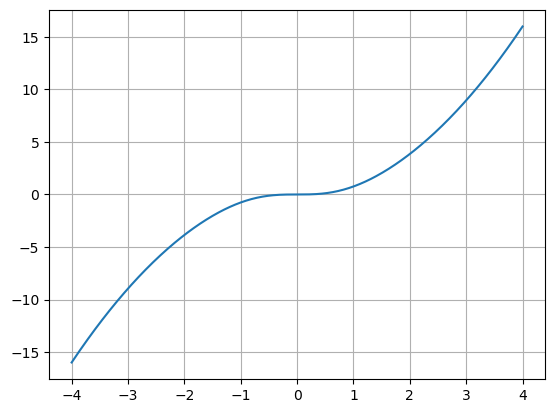

In [1]:
import numpy as np
import jax.numpy as jnp

def x_3(x):
    
    return np.where(x < -1 , 
                    np.where(x < -1, -1/(1+x**-4), x**3/2), 
                    np.where(x < 1, x**3/2, 1/(1+x**-4))
                    )

def x_3_2(x):
    if x < 0:
        return 0.0#-1/(1+x**-4)
    elif x >1:
        return 1/(1+x**-4)
    else:
        return x**3/2
    
def x_3_3(x):
    #return jnp.tanh(x)
    #return jnp.minimum(1, jnp.maximum(0, x**3/6 ))
    return x**2 /(1+ jnp.exp(-x))
    
    #return jnp.where(x < 1, jnp.maximum(0, x**3 ), 2/(1+x**-4))

def x_3_4(x):
    #return jnp.tanh(x)
    #return jnp.minimum(1, jnp.maximum(0, x**3/6 ))
    return x**2 * jnp.tanh(x)
import matplotlib.pyplot as plt
xs = jnp.linspace(-4.0, 4.0, 500).astype(np.float32)
plt.plot(xs, [x_3_4(x) for x in xs])
plt.grid()



In [2]:
import jax

grad_1 = jax.grad(x_3_4)
grad_2 = jax.grad(grad_1)
grad_3 = jax.grad(grad_2)

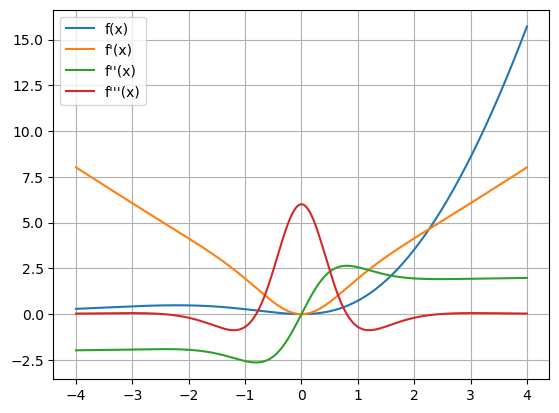

In [3]:
plt.plot(xs, [x_3_3(x) for x in xs],label="f(x)")
plt.plot(xs, [grad_1(x) for x in xs],label="f'(x)")
plt.plot(xs, [grad_2(x) for x in xs],label="f''(x)")
plt.plot(xs, [grad_3(x) for x in xs],label="f'''(x)")
plt.legend()
plt.grid()
plt.show()


In [10]:
from scipy.linalg import eigvals

In [11]:
eigvals([[0, 1], [-1, -1]])

array([-0.5+0.8660254j, -0.5-0.8660254j])